# Tutorial K-Means

### Importando as bibliotecas

In [161]:
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np

Iremos usar o estilo de plots como o *ggplot* (é mais bonito ^.^)

In [2]:
plt.style.use('ggplot')

O algoritmo do K-Means é relativamente simples. 
Dado um número k de clusters inicial (veremos porque isso pode ser um problema) selecionados aleatoriamente, são calculados as distâncias de cada ponto aos k pontos (centros) escolhidos e o ponto recebe a *label* do cluster mais próximo, re-calculamos os centros com base na média do cluster, até que os clusters não mudem.

Alguns problemas ficam evidentes pela construção do algoritmo:
- o número de clusters é dado inicialmente, e nem sempre sabemos o número correto
- o uso da média para re-calcular os centros pode ser problemático se considerarmos outliers
- dependendo da geometria dos clusters, pode ser necessário mapearmos os dados para uma dimensão maior antes de aplicar o K-Means

Para praticarmos, vejamos como ele se comporta com um dataset simples, utilizando a função *make_blobs* do *sklearn*.

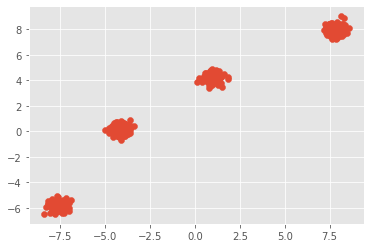

In [73]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.3, random_state=3)
plt.scatter(X[:, 0], X[:, 1])

Aplicando o KMeans com 4 clusters:

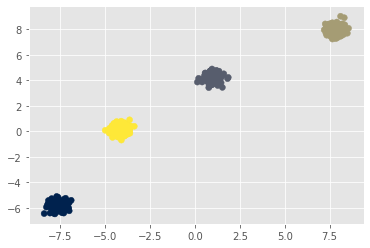

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_result = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap='cividis', c=y_result)

Vemos que o KMeans conseguiu selecionar bem cada um dos clusters.
Mas é evidente que nesse caso eles estão claramente bem separados, além disso, sabiamos pelo *plot* que seriam necessários 4 clusters.

Podemos *plotar* os dados junto com os centros obtidos pelo algoritmo.

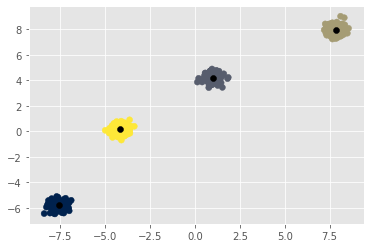

In [77]:
center = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], cmap='cividis', c=y_result)
plt.scatter(center[:, 0], center[:, 1], cmap='cividis', c='black')

Para fins de teste, iremos analisar um caso com 3 clusters, com os dados $X \sim Normal$ multivariada.
As médias e covariâncias são dadas na célula abaixo.

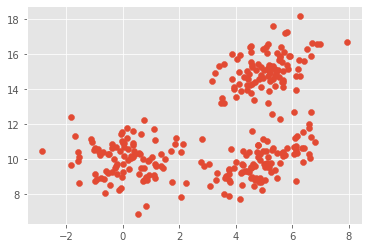

In [78]:
X_1 = np.random.multivariate_normal([0, 10], [[1, 0],[0, 1]], (100,))
X_2 = np.random.multivariate_normal([5, 15], [[1, 0.5],[0.5, 1]], (100,))
X_3 = np.random.multivariate_normal([5, 10], [[1, 0.5],[0.5, 1]], (100,))
X = np.append(np.append(X_1, X_2, axis=0), X_3, axis=0)

plt.scatter(X[:,0], X[:,1])

Como vimos anteriormente, o número de clusters pode influenciar fortemente nos resultados do K-Means, e ter de escolher esse valor de antemão pode ser problemático. Iremos verificar a diferença entre escolher 3 ou 4 clusters.

In [79]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)
y_result_3 = kmeans_3.predict(X)

kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(X)
y_result_4 = kmeans_4.predict(X)

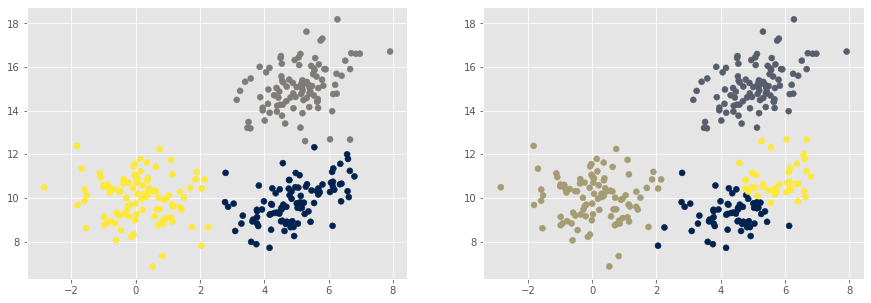

In [80]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], cmap='cividis', c=y_result_3)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], cmap='cividis', c=y_result_4)

Vemos que nesse caso, escolher 3 clusters foi razoável (sabiamos que seria o ideal), mas já com 4 clusters, o *label* dos dados do cluster em azul mudou parcialmente para amarelo (sendo que amarelo passou para bege claro).

Uma métrica utilizada para avaliar algoritmos não supervisionados é o Silhouette Score. Seu cálculo é dado por:

$$
SH = \frac{dist. entre clusters - dist. intra cluster}{max(dist. entre clusters, dist. intra cluster)}
$$

Essa medida por ser entendida como uma interpretação da variância presente nos dados. E veremos asseguir, como ela se aplica ao nosso pequeno dataset.

In [81]:
sil_3 = silhouette_score(X, y_result_3)
sil_4 = silhouette_score(X, y_result_4)

In [82]:
print("Silhouette score for 4 clusters: {:.4f} | Silhouette score for 3 clusters: {:.4f}".format(sil_3, sil_4))

Silhouette score for 4 clusters: 0.6370 | Silhouette score for 3 clusters: 0.5455


Podemos testar diferentes k's e verificar dentre eles, qual tem o maior Silhouette score. No nosso caso, 3 clusters é a opção ideal.

Text(0, 0.5, 'Número de clusters')

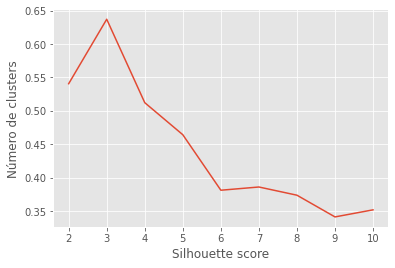

In [103]:
shs = []
x = []
for i in range(2,11):
    kmeans_i = KMeans(n_clusters=i)
    kmeans_i.fit(X)
    y_result_i = kmeans_i.predict(X)
    x.append(i)
    shs.append(silhouette_score(X, y_result_i))
    
plt.plot(x, shs)
plt.xlabel("Silhouette score")
plt.ylabel("Número de clusters")

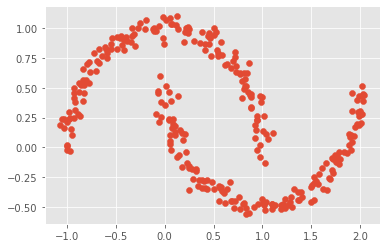

In [122]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=3)
plt.scatter(X[:,0], X[:,1])

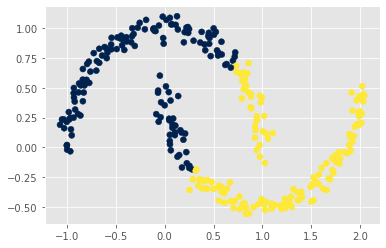

In [123]:
kmeans_moons = KMeans(n_clusters=2, n_init=20)
kmeans_moons.fit(X)
y_result_moons = kmeans_moons.predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap='cividis', c=y_result_moons)

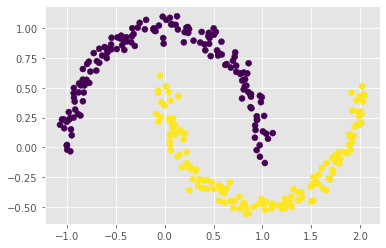

In [124]:
spc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
y_spc = spc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=y_spc)

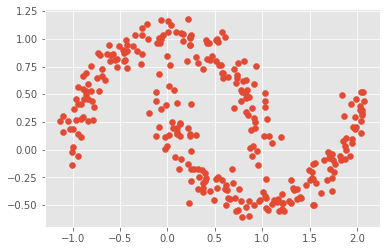

In [125]:
X, y = make_moons(n_samples=300, noise=0.09, random_state=3)
plt.scatter(X[:,0], X[:,1])

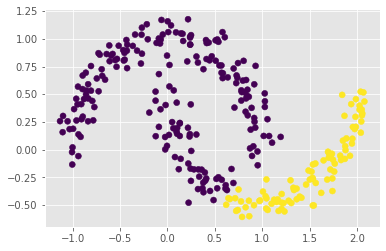

In [126]:
spc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
y_spc = spc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=y_spc)

In [129]:
digits = load_digits()
kmeans = KMeans(n_clusters=10, random_state=3)
y_result = kmeans.fit_predict(digits.data)

In [131]:
kmeans.cluster_centers_.shape

(10, 64)

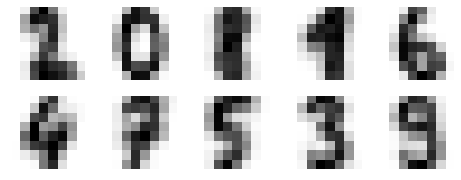

In [134]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [138]:
labels = np.zeros_like(y_result)
for i in range(10):
    mask = (y_result == i)
    labels[mask] = mode(digits.target[mask])[0]

In [153]:
acc = accuracy_score(digits.target, labels)
pr = precision_score(digits.target, labels, average='macro')
re = recall_score(digits.target, labels, average='macro')

print("Accuracy score:  {}".format(acc))
print("Recall score:    {}".format(re))
print("Precision score: {}".format(pr))
print("F1 score:        {}".format(2*((pr*re)/(pr+re))))

Accuracy score:  0.7896494156928213
Recall score:    0.7871397655779477
Precision score: 0.7429858947880124
F1 score:        0.7644257699871305


In [163]:
confusion_matrix(digits.target, labels)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 154,  24,   1,   0,   1,   2,   0,   0,   0],
       [  1,  10, 148,  13,   0,   0,   0,   3,   0,   2],
       [  0,   7,   0, 154,   0,   2,   0,   7,   0,  13],
       [  0,   8,   0,   0, 164,   0,   0,   9,   0,   0],
       [  0,   0,   0,   0,   2, 136,   1,   0,   0,  43],
       [  1,   3,   0,   0,   0,   0, 177,   0,   0,   0],
       [  0,   4,   0,   0,   0,   5,   0, 170,   0,   0],
       [  0, 105,   3,   2,   0,   8,   2,   2,   0,  52],
       [  0,  21,   0,   6,   0,   7,   0,   7,   0, 139]])